In [160]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from scipy.cluster.vq import vq, kmeans, kmeans2, whiten

%matplotlib inline

In [350]:
def convert_to_float(value):
    """
    Transforms argument value to float;
    Replaces the comma in a string variable with a dot and rounds the value to two decimal places;
    
    Parameters
    --------
    value: float
    
    Returns
    --------
    float
    
    """
    value = float(str(value).replace(",", "."))
    value = round(value, 2)
    return value

#######################################################################################################################

In [351]:
# Загрузка датафрейма из CSV файла;
cleared = pd.read_csv('../output/cleared.csv')

cleared = cleared[cleared['warp_dens'] < 40]

# Приведение типов колонок датафрейма к значению с плавающей запятой;
cleared['warp_a'] = cleared.warp_a.apply(convert_to_float)
cleared['warp_b'] = cleared.warp_b.apply(convert_to_float)
cleared['weft_a'] = cleared.weft_a.apply(convert_to_float)
cleared['weft_b'] = cleared.weft_b.apply(convert_to_float)
cleared['warp_mean'] = cleared.warp_mean.apply(convert_to_float)
cleared['weft_mean'] = cleared.weft_mean.apply(convert_to_float)
cleared['warp_dens'] = cleared.warp_dens.apply(convert_to_float)
cleared['weft_dens'] = cleared.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
cleared['warp_nominal'] = round((cleared['warp_a'] + cleared['warp_b']) / 2, 2)
cleared['weft_nominal'] = round((cleared['weft_a'] + cleared['weft_b']) / 2, 2)

cleared['dens_coef'] = round(cleared['warp_dens'] / cleared['weft_dens'], 2)
cleared['thick_coef'] = round(cleared['warp_nominal'] / cleared['weft_nominal'], 2)

In [352]:
cleared = cleared[['warp_dens', 'weft_dens', 'warp_nominal', 'weft_nominal', 'dens_coef', 'thick_coef', 'type']]

print(len(cleared))

cleared = cleared.dropna(axis=0)

cleared = cleared.copy(deep=True)

features = ['warp_dens', 'weft_dens', 'warp_nominal', 'weft_nominal', 'dens_coef', 'thick_coef']

# cleared = cleared[features]

y = cleared.loc[:,['type']].values

print(len(cleared))

273
273


In [353]:
x = cleared.loc[:, features].values

print(len(x))
print(len(y))

cleared.head()

273
273


,warp_dens,weft_dens,warp_nominal,weft_nominal,dens_coef,thick_coef,type
0,13.0,8.0,0.75,0.75,1.62,1.00,fabric
1,16.0,10.0,0.40,0.70,1.60,0.57,n_band
2,18.0,6.0,0.50,0.15,3.00,3.33,fabric
3,30.0,9.0,0.35,0.40,3.33,0.87,n_band
4,24.0,10.0,0.50,0.55,2.40,0.91,n_band


In [354]:
x = StandardScaler().fit_transform(x)

In [355]:
pd.DataFrame(data=x, columns=features).head()

,warp_dens,weft_dens,warp_nominal,weft_nominal,dens_coef,thick_coef
0,-0.933806,-0.708623,2.269443,1.732821,-0.644329,0.192203
1,-0.538771,0.118104,-0.558851,1.374442,-0.671350,-1.536738
2,-0.275415,-1.535349,0.249233,-2.567725,1.220069,9.560651
3,1.304724,-0.295259,-0.962893,-0.775831,1.665903,-0.330500
4,0.514654,0.118104,0.249233,0.299305,0.409461,-0.169669


In [356]:
pca = PCA(n_components=2)

In [357]:
principalComponents = pca.fit_transform(x)

In [358]:
# help(pca)

In [359]:
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [360]:
principalDf.head(5)

,principal component 1,principal component 2
0,2.854995,0.287855
1,1.067840,-1.333582
2,-1.826417,7.000243
3,-1.996446,-1.191876
4,-0.185952,-0.383221


In [361]:
cleared[['type']].head()

,type
0,fabric
1,n_band
2,fabric
3,n_band
4,n_band


In [367]:
finalDf = pd.concat([principalDf, cleared[['type']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,type
0,2.854995,0.287855,fabric
1,1.067840,-1.333582,n_band
2,-1.826417,7.000243,fabric
3,-1.996446,-1.191876,n_band
4,-0.185952,-0.383221,n_band


In [370]:
print(len(principalDf))
print(len(cleared[['type']]))

finalDf.drop(finalDf.tail(1).index,inplace=True)

# finalDf = finalDf.dropna(axis=0)

print(len(finalDf))

finalDf

273
273
273


,principal component 1,principal component 2,type
0,2.854995,0.287855,fabric
1,1.067840,-1.333582,n_band
2,-1.826417,7.000243,fabric
3,-1.996446,-1.191876,n_band
4,-0.185952,-0.383221,n_band
...,...,...,...
268,-0.493291,1.732581,funeral_shroud
269,0.504162,-0.008258,f_strip
270,-0.868077,2.000880,n_band
271,-0.868077,2.000880,funeral_shroud


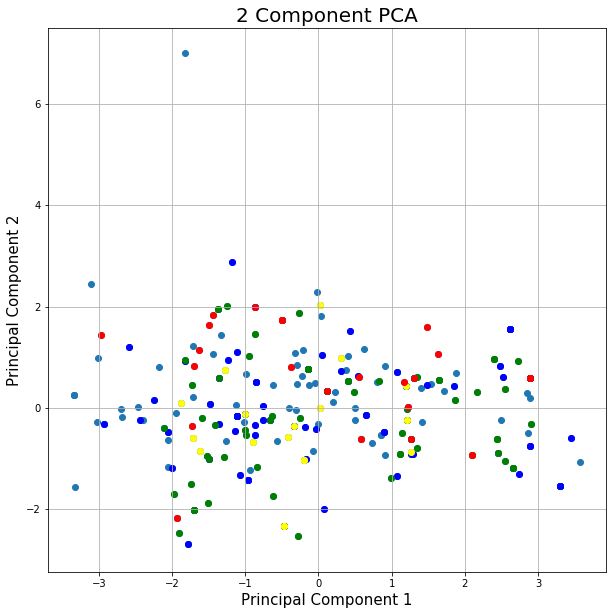

In [371]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

types = list(set(cleared.type))

ax.scatter(finalDf['principal component 1'].tolist(), finalDf['principal component 2'].tolist())

n_bands = finalDf[finalDf['type'] == 'n_band']
m_bands = finalDf[finalDf['type'] == 'm_band']
w_bands = finalDf[finalDf['type'] == 'w_band']

shrouds = finalDf[finalDf['type'] == 'funeral_shroud']

ax.scatter(n_bands['principal component 1'].tolist(), n_bands['principal component 2'].tolist(), color='blue')
ax.scatter(m_bands['principal component 1'].tolist(), m_bands['principal component 2'].tolist(), color='green')
ax.scatter(w_bands['principal component 1'].tolist(), w_bands['principal component 2'].tolist(), color='yellow')
ax.scatter(shrouds['principal component 1'].tolist(), shrouds['principal component 2'].tolist(), color='red')

ax.grid()

plt.show()

In [372]:
# Получение нормальзованных значений параметров для кластеризации;
whitened = whiten(list(zip(finalDf['principal component 1'].tolist(), finalDf['principal component 2'].tolist())))

# получаем центроиды и метки кластеров;
centroids, labels = kmeans2(whitened, 3, iter=100)

finalDf['labels'] = labels

In [373]:
cluster_1 = finalDf[finalDf['labels'] == 0]
cluster_2 = finalDf[finalDf['labels'] == 1]
cluster_3 = finalDf[finalDf['labels'] == 2]
# cluster_4 = finalDf[finalDf['labels'] == 3]
# cluster_5 = finalDf[finalDf['labels'] == 4]

In [374]:
print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))
# print(len(cluster_4))
# print(len(cluster_5))

95
97
81


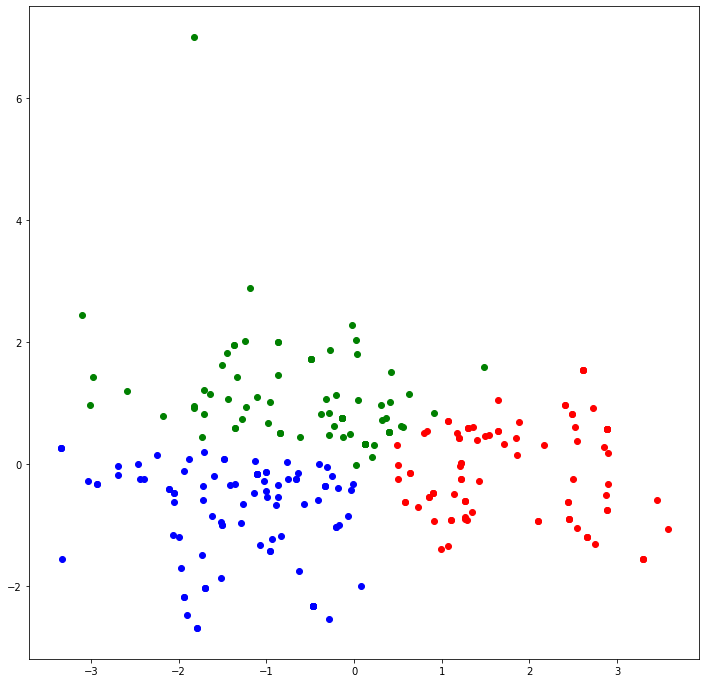

In [375]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(cluster_1['principal component 1'].tolist(), cluster_1['principal component 2'].tolist(), color='red')
ax.scatter(cluster_2['principal component 1'].tolist(), cluster_2['principal component 2'].tolist(), color='blue')
ax.scatter(cluster_3['principal component 1'].tolist(), cluster_3['principal component 2'].tolist(), color='green')
# ax.scatter(cluster_4['principal component 1'].tolist(), cluster_4['principal component 2'].tolist(), color='yellow')
# ax.scatter(cluster_5['principal component 1'].tolist(), cluster_5['principal component 2'].tolist(), color='gray')

plt.show()

In [376]:
cleared['labels'] = labels

In [377]:
cluster_1 = cleared[cleared['labels'] == 0]
cluster_2 = cleared[cleared['labels'] == 1]
cluster_3 = cleared[cleared['labels'] == 2]
# cluster_4 = cleared[cleared['labels'] == 3]
# cluster_5 = cleared[cleared['labels'] == 4]

In [378]:
print(cluster_1.warp_dens.mean())
print(cluster_1.weft_dens.mean())
print(cluster_1.warp_nominal.mean())
print(cluster_1.weft_nominal.mean())
print("===================================")
print(cluster_1.warp_dens.max())
print(cluster_1.warp_dens.min())
print(cluster_1.weft_dens.max())
print(cluster_1.weft_dens.min())

12.947368421052632
8.105263157894736
0.5710526315789475
0.645263157894737
22.0
8.0
12.0
4.0


In [379]:
print(cluster_2.warp_dens.mean())
print(cluster_2.weft_dens.mean())
print(cluster_2.warp_nominal.mean())
print(cluster_2.weft_nominal.mean())
print("===================================")
print(cluster_2.warp_dens.max())
print(cluster_2.warp_dens.min())
print(cluster_2.weft_dens.max())
print(cluster_2.weft_dens.min())

27.1340206185567
10.02061855670103
0.3869072164948454
0.4597938144329898
36.0
12.0
15.0
5.0


In [380]:
print(cluster_3.warp_dens.mean())
print(cluster_3.weft_dens.mean())
print(cluster_3.weft_nominal.mean())
print(cluster_3.warp_nominal.mean())
print("===================================")
print(cluster_3.warp_dens.max())
print(cluster_3.warp_dens.min())
print(cluster_3.weft_dens.max())
print(cluster_3.weft_dens.min())

20.037037037037038
11.234567901234568
0.40555555555555556
0.44814814814814813
36.0
9.0
16.0
6.0


In [381]:
# print(cluster_4.warp_dens.mean())
# print(cluster_4.weft_dens.mean())
# print(cluster_4.weft_nominal.mean())
# print(cluster_4.warp_nominal.mean())
# print("===================================")
# print(cluster_4.warp_dens.max())
# print(cluster_4.warp_dens.min())
# print(cluster_4.weft_dens.max())
# print(cluster_4.weft_dens.min())

In [382]:
# print(cluster_5.warp_dens.mean())
# print(cluster_5.weft_dens.mean())
# print(cluster_5.weft_nominal.mean())
# print(cluster_5.warp_nominal.mean())
# print("===================================")
# print(cluster_5.warp_dens.max())
# print(cluster_5.warp_dens.min())
# print(cluster_5.weft_dens.max())
# print(cluster_5.weft_dens.min())

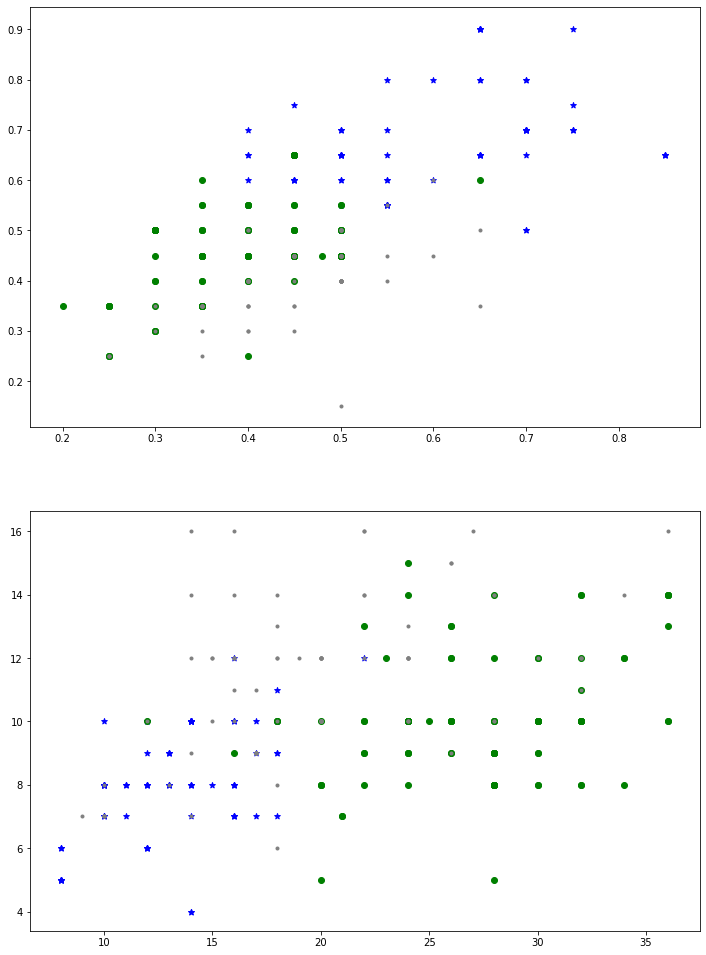

In [383]:
fig, ax = plt.subplots(2, 1, figsize=(12, 17))

ax[0].scatter(cluster_1['warp_nominal'].tolist(), cluster_1['weft_nominal'].tolist(), marker='*', color='blue')
ax[0].scatter(cluster_2['warp_nominal'].tolist(), cluster_2['weft_nominal'].tolist(), marker='o', color='green')
ax[0].scatter(cluster_3['warp_nominal'].tolist(), cluster_3['weft_nominal'].tolist(), marker='.', color='gray')
# ax[0].scatter(cluster_4['warp_nominal'].tolist(), cluster_4['weft_nominal'].tolist(), marker='o', color='yellow')
# ax[0].scatter(cluster_5['warp_nominal'].tolist(), cluster_5['weft_nominal'].tolist(), marker='.', color='gray')

ax[1].scatter(cluster_1['warp_dens'].tolist(), cluster_1['weft_dens'].tolist(), marker='*', color='blue')
ax[1].scatter(cluster_2['warp_dens'].tolist(), cluster_2['weft_dens'].tolist(), marker='o', color='green')
ax[1].scatter(cluster_3['warp_dens'].tolist(), cluster_3['weft_dens'].tolist(), marker='.', color='gray')
# ax[1].scatter(cluster_4['warp_dens'].tolist(), cluster_4['weft_dens'].tolist(), marker='o', color='yellow')
# ax[1].scatter(cluster_5['warp_dens'].tolist(), cluster_5['weft_dens'].tolist(), marker='.', color='gray')

plt.show()

In [386]:
features = ['warp_dens', 'weft_dens', 'warp_nominal', 'weft_nominal']

In [387]:
cluster_1 = cluster_1[features]
cluster_2 = cluster_2[features]
cluster_3 = cluster_3[features]

In [389]:
cluster_1.to_excel('../output/pca_clusters/cluster_1.xls')
cluster_2.to_excel('../output/pca_clusters/cluster_2.xls')
cluster_3.to_excel('../output/pca_clusters/cluster_3.xls')